In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import qgrid
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

#import pzfxlib as pz
#from openpyxl import Workbook
#from openpyxl.utils import get_column_letter
%matplotlib notebook
%config IPCompleter.greedy=True


In [2]:
#paste Mouse Grouping as you defines structure in Prism
#group_columns = ['Group','id']
B75_group_tbl = pd.read_csv("B75-group.csv", 
                        sep=',',
                       dtype={"group":str, "id":str})

B73_group_tbl = pd.read_csv("B73-group.csv", 
                        sep=',',
                       dtype={"group":str, "id":str})


In [3]:
#load bleed timepoints RNA Ct value from excel
B73_excel = pd.ExcelFile('B73 RNA MX1 HPRT1 Ct.xlsx')
B73_sheets = B73_excel.sheet_names
B73_timepoints = B73_sheets

B75_excel = pd.ExcelFile('B75 RNA MX1 HPRT1 Ct.xlsx')
B75_sheets = B75_excel.sheet_names
B75_timepoints = B75_sheets


In [10]:
def graphByLog10Ct (cohort_excel_file, cohort_group_tbl):
    cohort_excel = pd.ExcelFile(cohort_excel_file)
    cohort_sheets = cohort_excel.sheet_names
    df_timepoints = pd.DataFrame()
    for i in cohort_sheets:
        df = pd.read_excel(cohort_excel,i)
        df['id'] = df['id'].astype(str)
        df = cohort_group_tbl.merge(df, on='id',how='left')

        df['time-point'] = i
        df['Ct ratio'] = df['MX1'].div(df['HPRT1'], axis ="index") # normalize by HPRT1
        df['Log10 Ct'] = -np.log(df['Ct ratio'])  # negative log10 transformation scale
        df_timepoints = df_timepoints.append(df)
        
    df_timepoints = df_timepoints.dropna(subset=['Log10 Ct'])
    df_timepoints.reset_index()
        
    plt.figure(figsize = (12, 12), dpi= 100)
    sns.set_style("whitegrid")
    ax = sns.boxplot(x = "time-point", y = "Log10 Ct", data = df_timepoints, hue ='Group', linewidth=1)
    
    # ----------------------------------------------------------------------------------------------------
    # prettify the plot

    # get the current figure
    ax = plt.gca()
    #ax.grid(color='#cccccc')
    # get the xticks to iterate over
    xticks = ax.get_xticks()

    # iterate over every xtick and add a vertical line
    # to separate different classes
    #pos = range(len(nobs))

    for tick in xticks:
        ax.vlines(tick + 0.5, 0, np.max(df_timepoints["Log10 Ct"]), color = "grey", alpha = .1)
        #ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
                #horizontalalignment='center', size='small', color='black', weight='semibold')


    # rotate the x and y ticks
    ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
    ax.tick_params(axis = 'y', labelsize = 12)

    # add x and y label
    ax.set_xlabel("Post infection Time points", fontsize = 14)
    ax.set_ylabel("Relative MX1/HPRT1 expression", fontsize = 14)

    # add a title and put the legend on a specific location
    ax.set_title("MX1 expression using Ct value", fontsize = 14)
    ax.legend(loc = "lower left", fontsize = 10);
    plt.show()
    return df_timepoints



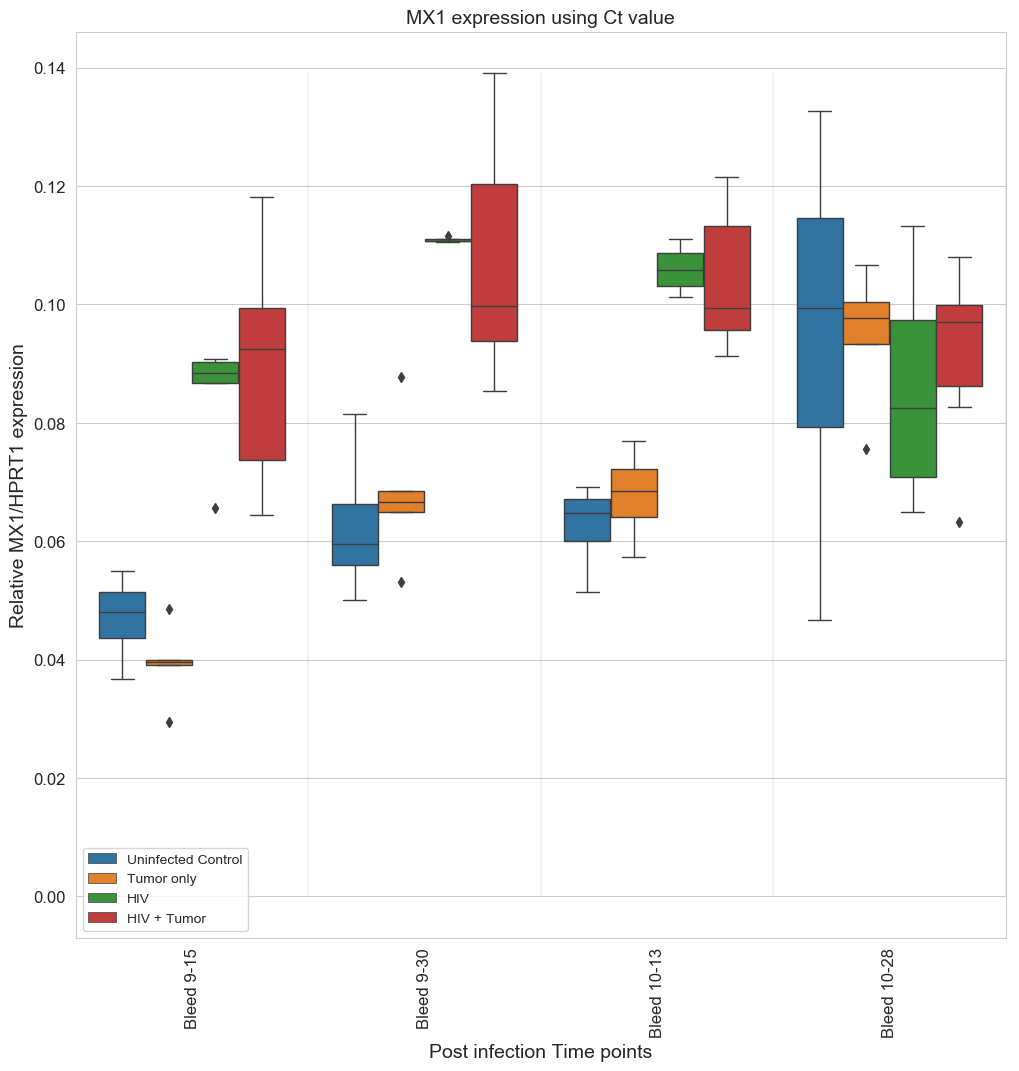

In [11]:
df_B75 = graphByLog10Ct(cohort_excel_file = 'B75 RNA MX1 HPRT1 Ct.xlsx', cohort_group_tbl = B75_group_tbl )


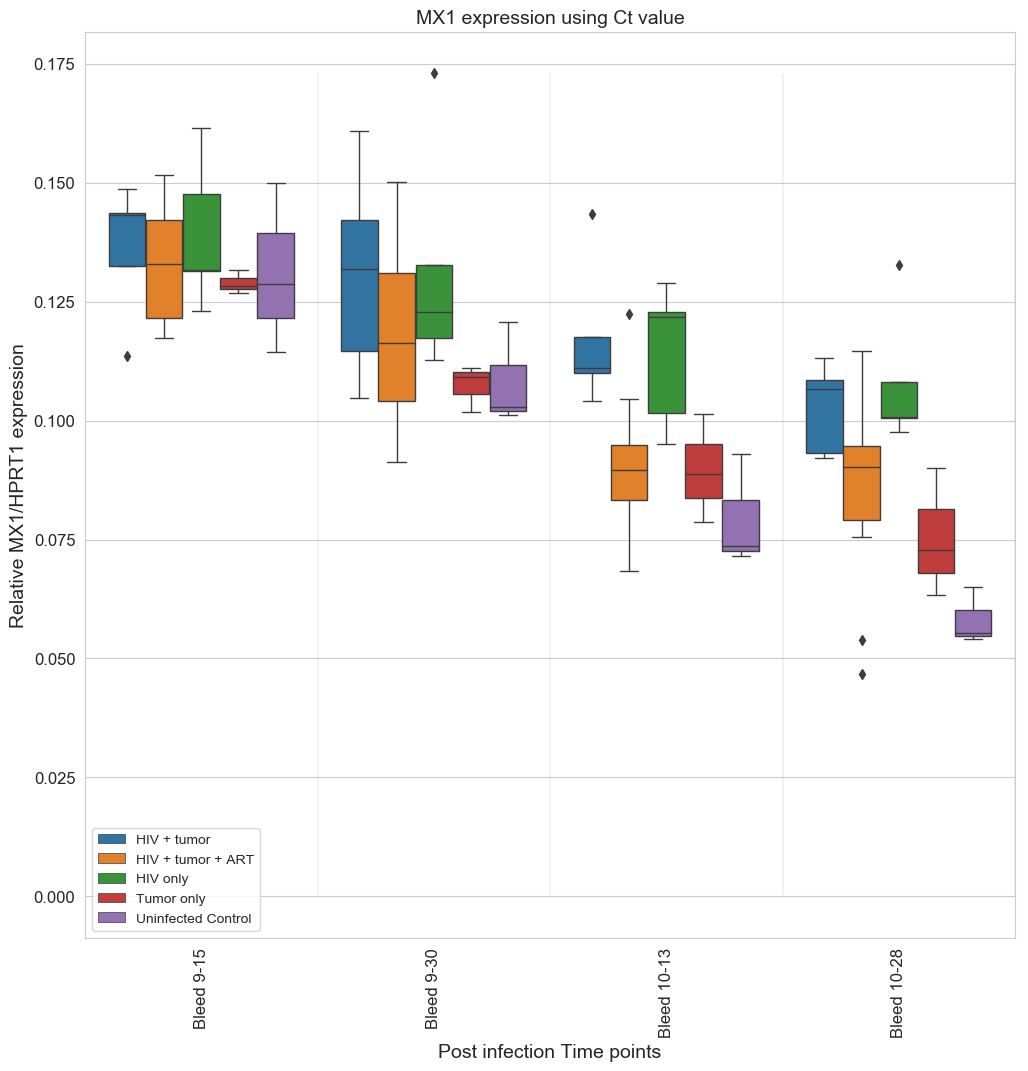

In [12]:
df_B73 = graphByLog10Ct(cohort_excel_file = 'B73 RNA MX1 HPRT1 Ct.xlsx', cohort_group_tbl = B73_group_tbl )

In [ ]:
df_timepoints = pd.DataFrame()
timepointPreFix_array = []
for i in B75_sheets:
    df = pd.read_excel(B75_excel,i)
    df['id'] = df['id'].astype(str)
    df = B75_group_tbl.merge(df, on='id',how='left')
    
    df['time-point'] = i
    df['Ct ratio'] = df['MX1'].div(df['HPRT1'], axis ="index") # normalize by HPRT1
    df['Log10 Ct'] = -np.log10(df['Ct ratio'])  # negative log10 transformation scale

    #timepointPreFix = i + ':'
    #timepointPreFix_array.append(timepointPreFix)
    #df.columns = df.columns.map(lambda x : timepointPreFix + x if x !='id' else x)
    #df_timepoints = df_timepoints.merge(df, on='id',how='left')
    df_timepoints = df_timepoints.append(df)

#df_timepoints = B75_group_tbl.merge(df_timepoints, on='id',how='left')

df_timepoints = df_timepoints.dropna(subset=['Log10 Ct'])
df_timepoints.reset_index()
        
plt.figure(figsize = (12, 12), dpi= 100)
sns.set_style("whitegrid")
ax = sns.boxplot(x = "time-point", y = "Log10 Ct", data = df_timepoints, hue ='Group', linewidth=1)
#sns.stripplot(x = 'time-point', y = 'Log10 Ct', data = df_timepoints, hue ='Group', color = 'black', size = 5, jitter = 1,dodge=True)
#sns.swarmplot(x = 'time-point', y = 'Log10 Ct', data = df_timepoints, hue ='Group', color = '.25')

#medians = df_timepoints.groupby(['time-point','Group'])['Log10 Ct'].median().values
#nobs = df_timepoints.groupby(['time-point','Group'])['Log10 Ct'].value_counts().values
#nobs = [str(x) for x in nobs.tolist()]
#nobs = ["n: " + i for i in nobs]


# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the current figure
ax = plt.gca()
#ax.grid(color='#cccccc')
# get the xticks to iterate over
xticks = ax.get_xticks()

# iterate over every xtick and add a vertical line
# to separate different classes
#pos = range(len(nobs))

for tick in xticks:
    ax.vlines(tick + 0.5, 0, np.max(df_timepoints["Log10 Ct"]), color = "grey", alpha = .1)
    #ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            #horizontalalignment='center', size='small', color='black', weight='semibold')


# rotate the x and y ticks
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# add x and y label
ax.set_xlabel("Post infection Time points", fontsize = 14)
ax.set_ylabel("Relative MX1/HPRT1 expression", fontsize = 14)

# add a title and put the legend on a specific location
ax.set_title("MX1 expression using Ct value", fontsize = 14)
ax.legend(loc = "lower left", fontsize = 10);
plt.show()    

#ax1 = sns.catplot(x = "time-point", y = "Log10 Ct", data = df_timepoints, hue ='Group', kind='swarm')
#g = sns.catplot(x = "time-point", y = "Log10 Ct", data = df_timepoints, hue ='Group', kind='violin', inner=None)
#sns.swarmplot(x="time-point", y="Log10 Ct", color="k", size=3, data=df_timepoints, ax=g.ax)
#df_timepoints.boxplot(column=['Log10 Ct'], by = 'time-point')

In [ ]:
df_timepoints = pd.DataFrame()
timepointPreFix_array = []
for i in B73_sheets:
    df = pd.read_excel(B73_excel,i)
    df['id'] = df['id'].astype(str)
    df = B73_group_tbl.merge(df, on='id',how='left')
    
    df['time-point'] = i
    df['Ct ratio'] = df['MX1'].div(df['HPRT1'], axis ="index") # normalize by HPRT1
    df['Log Ct'] = np.log(df['Ct ratio'])  # negative log10 transformation scale

    #timepointPreFix = i + ':'
    #timepointPreFix_array.append(timepointPreFix)
    #df.columns = df.columns.map(lambda x : timepointPreFix + x if x !='id' else x)
    #df_timepoints = df_timepoints.merge(df, on='id',how='left')
    df_timepoints = df_timepoints.append(df)

#df_timepoints = B75_group_tbl.merge(df_timepoints, on='id',how='left')

df_timepoints = df_timepoints.dropna(subset=['Log Ct'])
df_timepoints.reset_index()
        
plt.figure(figsize = (12, 12), dpi= 100)
sns.set_style("whitegrid")
ax = sns.boxplot(x = "time-point", y = "Ct ratio", data = df_timepoints, hue ='Group', linewidth=1)
#sns.stripplot(x = 'time-point', y = 'Log10 Ct', data = df_timepoints, hue ='Group', color = 'black', size = 5, jitter = 1,dodge=True)
#sns.swarmplot(x = 'time-point', y = 'Log10 Ct', data = df_timepoints, hue ='Group', color = '.25')

#medians = df_timepoints.groupby(['time-point','Group'])['Log10 Ct'].median().values
#nobs = df_timepoints.groupby(['time-point','Group'])['Log10 Ct'].value_counts().values
#nobs = [str(x) for x in nobs.tolist()]
#nobs = ["n: " + i for i in nobs]


# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the current figure
ax = plt.gca()
#ax.grid(color='#cccccc')
# get the xticks to iterate over
xticks = ax.get_xticks()

# iterate over every xtick and add a vertical line
# to separate different classes
#pos = range(len(nobs))

for tick in xticks:
    ax.vlines(tick + 0.5, 0, np.max(df_timepoints["Ct ratio"]), color = "grey", alpha = .1)
    #ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            #horizontalalignment='center', size='small', color='black', weight='semibold')


# rotate the x and y ticks
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# add x and y label
ax.set_xlabel("Post infection Time points", fontsize = 14)
ax.set_ylabel("Relative MX1/HPRT1 expression", fontsize = 14)

# add a title and put the legend on a specific location
ax.set_title("MX1 expression using Ct value", fontsize = 14)
ax.legend(loc = "lower left", fontsize = 10);
plt.show()    

#ax1 = sns.catplot(x = "time-point", y = "Log10 Ct", data = df_timepoints, hue ='Group', kind='swarm')
#g = sns.catplot(x = "time-point", y = "Log10 Ct", data = df_timepoints, hue ='Group', kind='violin', inner=None)
#sns.swarmplot(x="time-point", y="Log10 Ct", color="k", size=3, data=df_timepoints, ax=g.ax)
#df_timepoints.boxplot(column=['Log10 Ct'], by = 'time-point')